# 第7部　統計学と機械学習

## 第一章　機械学習の基本

第一章では、機械学習の導入をした上で、統計学と機械学習の関係について説明します。  
両者の関係例に関して、完全に合意のとれた分類があるわけではありませんが、ここでは用語の説明を混ぜながら、おおよその目安となりうる類似点・相違点を紹介します。

### 用語説明

#### **機械学習**
機械学習は、コンピュータに学習能力を与えることを目的とした研究分野のことです。  
学習はデータに基づき行われ、データの持つ規則性を明らかにし、未知のデータの予測などに活用されます。  
機械学習は大きく**教師あり学習**と**教師なし学習**に分かれます。

##### **教師あり学習**
教師あり学習は、正解データが得られる問題に取り組む学習です。  
例えば売上を予測する場合、売上データが手に入ると「予測結果があっているか間違っているか」を評価することができ、正規線形モデルや一般化線形モデルで扱った問題が教師あり学習だとみなすことができます。

##### **教師なし学習**
教師なし学習は、正解データが得られない問題に取り組む学習です。  
例えば、いろいろな魚のDNAを使って、近縁種とそうでない種に分類する場合などがあります。  
正解が得られない中で、最もよいだろうと思われる分類を提案します。

#### **強化学習**
ある与えられた状況において、何らかの報酬を最大にするような行動を見つけるという問題を解くものを強化学習と呼びます。  
教師あり学習と異なり、正解データは与えられません。

#### **ルールベース機械学習**
あらかじめ人間がルールを指定した上でそのルールに沿って予測結果を出力する手法をルールベース機械学習と呼び、先述の機械学習とは別のものとして取り扱います。  
複雑な現象に対して人間が逐一ルールを指定するというやり方では、データに合わせた柔軟な予測が出しにくい、効率が悪いということがあります。

### 統計学は過程、機械学習は結果に注目する

ロジスティック回帰などの特定の手法に対して、これが統計学の範疇に入るものか機械学習の範疇に入るものかを明確に分けるのが難しいことがあります。  
統計学の入門書にも機械学習の入門書のどちらにも重回帰分析やロジスティック回帰という単語が目次に載っていることがしばしばあります。

統計学と機械学習は、やっていることは似ているのですが、データを分析する目的が少し異なります。

#### 統計モデルの目的は「データが手に入るプロセスを理解すること」

統計学はデータを得られるプロセス（過程）に注目します。過程が分かったら、次にどんなデータがやってくるのか予測もできるだろう、と考えます。  
統計モデルを用いることで予測を行うことも可能となりますが、あくまでも過程の理解が第一で、予測はその次となります。

#### 機械学習の目的は「未知のデータを計算によって手に入れること」

機械学習は、次にどのような結果が得られるかに注目します。そのため、中身がブラックボックスとなるようなモデルもしばしば使用されます。

ただし、明確にこの分類で分けられるわけではありません。機械学習法でも、現象の理解ができるように工夫することもあります。あくまでも分類の目安です。


## 第2章　正則化とRidge回帰・Lasso回帰

この章では、統計学と機械学習をつなぐモデルとして、Ridge回帰とLasso回帰を導入します。  
これらのモデルは単純に予測モデルとして優秀であるだけでなく、さまざまな機械学習法で用いられる正則化という理論を理解するための教材としても優れています。

### 用語説明

#### **正則化**
パラメータを推定する際に、損失関数に罰則項を導入することで、係数が大きくなる値となることを防ぐ技法を正則化と呼びます。  
罰則項は**正則化項**とも呼ばれます。統計学においてはパラメータの**縮小推定**と呼ばれることもあります。

#### **Ridge回帰**
正則化項として係数の2乗和を用いた回帰モデルをRidge回帰と呼びます。  このタイプの正則化を**$L_2$正則化**とも呼びます。  
この章では回帰モデルとして正規線形モデルを対象としますが、ロジスティック回帰などでもほぼ同様の拡張が可能です。

数式を使ってRidge回帰を導入します。
サンプルサイズが$I$のデータがあったとします。$i$番目の応答変数を$y_i$とします。  
説明変数は合計で$J$種類あります。$j$種類目の説明変数が、各々$I$個あるわけです。  
そのため、$i$番目のデータの$j$種類目の説明変数は$x_{ij}$と表記されます。$j$種類目の説明変数に対応する回帰係数を$\beta_j$とします。

通常の最小二乗法は以下の残差平方和を最小とする係数を推定します。

$$\sum_{i=1}^I \biggl( y_i - \sum_{j=1}^J \beta_j x_{ij} \biggr)^2$$

Ridge回帰は以下の罰則付きの残差平方和を最小とする係数を推定します。

$$\sum_{i=1}^I \biggl[ \biggl( y_i - \sum_{j=1}^J \beta_j x_{ij} \biggr)^2 + \alpha \sum_{j=1}^J \beta_j^2 \biggr]$$

この式では切片が含まれていないように見えます。しかし、常に値が1である説明変数を用いると、それに対応する係数は切片とみなすことができます。  
このため、上記の数式でも切片のあるモデルを表現できます。

残差平方和を小さくしたいが、罰則はあまり請けたくない。そのため、絶対値の小さな係数が推定される。これが縮小推定と呼ばれる所以です。  
この式における$\alpha$が正則化の強さを指定するパラメータで、$\alpha$が大きければ、罰則の影響が強くなるので係数の絶対値は小さくなります。

#### **Lasso回帰**

正則化項として係数の絶対値の和を用いた回帰モデルをLasso回帰と呼びます。このタイプの正則化を**$L_1$正則化**とも呼びます。

Lasso回帰は以下の罰則付きの残差平方和を最小とする係数を推定します。罰則項が絶対値の和になった点を除けばRidge回帰と同じです。

$$\sum_{i=1}^I \biggl[ \biggl( y_i - \sum_{j=1}^J \beta_j x_{ij} \biggr)^2 + \alpha \sum_{j=1}^J | \beta_j | \biggr]$$


### 正則化の強度を指定するパラメータの決定方法

正則化項に現れる$\alpha$を決定する方法を説明します。  
まずは、$\alpha$をさまざまに変化させた上で、クロスバリデーションを用いてテストデータへの予測精度を評価します。  
そして、テストデータへの予測精度が最も高くなる$\alpha$を採用します。

正則化項に現れる$\alpha$を決定するのは一筋縄ではいきません。  
$\alpha$を含めて最適化の対象にすると、必ず$\alpha=0$となった上で、残差平方和を最小にするように動いてしまうからです。これでは普通の最小二乗法と代わりありません。  
このため、少し手間がかかりますが、クロスバリデーションを援用します。


### 説明変数の標準化の必要性

Ridge回帰やLasso回帰を実行する前に、あらかじめ説明変数を平均0、標準偏差1に標準化する必要があります。

たとえば、説明変数としてkg単位のデータを用いたときとg単位のデータを用いた時では、回帰係数をの絶対値の大きさが変わります。  
回帰係数の絶対値が大きくなると、罰則の影響も大きくなります。  
説明変数の単位がパラメータ推定時に影響を与えるのを防ぐために、あらかじめ説明変数を標準化します。

### Ridge回帰とLasso回帰のパラメータの推定結果の差

Ridge回帰は全体的に絶対値の小さな回帰係数が得られやすく、一方のLasso回帰はほとんどのパラメータが0となり、一部のパラメータだけが0と異なる値になりやすいです。  
これは次の第3章での計算例をみると、より明確になるでしょう。  
Lasso回帰は疎（スパース）な解が得られるためスパースモデリングという名前で紹介されることもあります。

Ridge回帰とLasso回帰がなぜ上記のような特徴を持つのか、その理由を以下の条件のもと簡単に説明します。

条件①：説明変数が$\beta_1$と$\beta_2$の2つだけ  
条件②：正則化項において$\alpha = 1$  
条件③：Ridge回帰とLasso回帰のそれぞれで、罰則項の大きさが1  

まず「$\beta_1=1$、$\beta_2=0$」という状況を考えます。  
Ridge回帰でもLasso回帰でも、ともに罰則の大きさは1となります。

次に、「$\beta_1=0.5$、$\beta_2=0.5$」という状況を考えます。  
この時のLasso回帰の罰則の大きさは1となりますが、Ridge回帰の罰則のの大きさは「$0.5^2+0.5^2=0.5$」となります。  
Ridge回帰の罰則の大きさのほうが小さくなります。  
「$0.7^2+0.7^2$」がおおよそ1となるので、Lasso回帰と同じ罰則の大きさになるまで、少し大きな係数になる余裕があることになります。

このため、Ridge回帰は「全体的に絶対値が小さい係数」が推定される傾向があり、Lasso回帰は「一部の係数だけが0とは異なる値をとり、それ以外の係数はすべて0」という結果になりやすくなります。

<img src="regression.png", width=320, height=240>

### 変数選択と正則化の比較

変数選択では、AICなどに基づき、不要な説明変数をモデルから除外します。  
こうすることにより、推定すべき未知のパラメータの数を減らし、モデルの単純化および過学習の抑制につながります。  

過学習を防ぐもうひとつの方針が、今回のテーマである正則化です。  
正則化項をいれることで絶対値の大きな係数を推定することを避け、結果的に説明変数が応答変数に与える影響を減らすことができます。  
特に<u>Lasso回帰は得られる係数のほとんどが0になるため、変数選択をしているのと似た結果を示します</u>。

### 正則化の意義

統計モデルの立場になったときの正則化の意義は、AICのなどを用いた変数選択における欠点をある程度緩和できることにあります。

* AICの欠点
    * 変数の組み合わせ全通りに対して逐一モデルを推定　→　計算量が大変
    * サンプルサイズよりも説明変数の種類数のほうが大きいデータが与えられた時のモデルを推定　→　最小二乗法や最尤法でパラメータを一意に推定することが困難
    
機械学習の立場になったときの正則化の意義は、過学習を抑えることにつきます。  
機械学習にはさまざまな手法が提案されていますが、AICなどが計算できて変数選択が行えることは稀です。  
正則化は過学習を抑えるためにさまざまなモデルで取り入れられています。



## 第3章　PythonによるRige回帰・Lasso回帰

第3章では実際に、Pythonを用いてRidge回帰やLasso回帰を推定します。  
機械学習において中心的な役割を果たすsklearnを中心に使用していくことにします。

### scikit-learn

scikit-learnはPythonにおいて機械学習を適用するのに頻繁に用いられるパッケージです。sklearnと略します。

### 分析の準備

分析の準備として、`linear_model`をsklearnからインポートします。

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ(ワーニングが出ることもあります)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 機械学習法を適用するためのライブラリ
from sklearn import linear_model

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

/Users/kaito/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# ファイルからのデータ読み込み
"""
サンプルサイズは150で、説明変数が100個あるデータ
"""
X = pd.read_csv("7-3-1-large-data.csv")
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


### 実装：標準化

まずは、データの標準化をします。  
標準化は、各々の変数から平均値を引いて、標準偏差で割るのでした。こうすることにより、平均0、標準偏差1になります。

In [6]:
# 標準化
X -= sp.mean(X, axis = 0)
X /= sp.std(X, ddof = 1, axis = 0)

# 確認
print(sp.mean(X, axis = 0).head(3).round(3))

# 確認
print(sp.std(X, ddof = 1, axis = 0).head(3))

X_1   -0.0
X_2   -0.0
X_3    0.0
dtype: float64
X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64


### シミュレーションで応答変数を作る

読み込んだデータには応答変数がなかったので、これから作成します。

正しい係数は5であるとして、応答変数を作ります。  
正規分布に従うノイズが入っていることにします。

In [7]:
# 応答変数を作る

# 正規分布に従うノイズ
np.random.seed(1)
noise =  sp.stats.norm.rvs(loc = 0, scale = 1, size = X.shape[0])

# 正しい係数は5として応答変数を作る
y =  X.X_1 * 5 + noise

応答変数とX_1の関係を図示してみます。

/Users/kaito/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


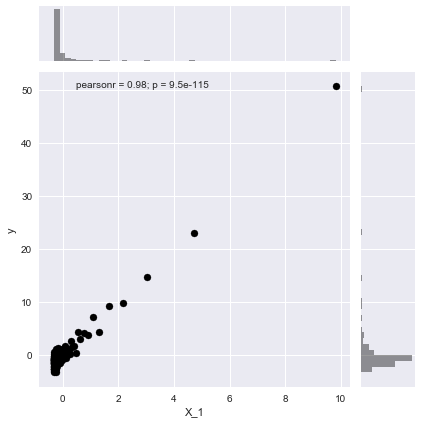

In [8]:
# 応答変数と説明変数をまとめる
large_data = pd.concat([pd.DataFrame({"y":y}), X], axis = 1)
# 散布図の作成
sns.jointplot(y = "y", x = "X_1", data = large_data,
              color = 'black')

### 実装：statsmodelsで普通の最小二乗法を適用する

正則化の効果を確かめるためにも、まずは通常の最小二乗法を用いてパラメータ推定を行います。  
説明変数が多いとformulaを書くのがやや面倒なので、以下のように説明変数と応答変数を指定してモデル化します。

In [9]:
lm_statsmodels = sm.OLS(endog = y, exog = X).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

結果をみると、応答変数の作成時とは異なる、おかしな値が推定されていることが分かります。

### 実装：sklearnで通常の最小二乗法を適用する

正則化を用いたモデルに移る前に、sklearnを使って通常の最小二乗法を用いた正規線形モデルを推定してみます。

先程と同様に、絶対値が大きな係数が推定されていることに注目。

In [10]:
# どんなモデルを作るかをまずは指定する
lm_sklearn = linear_model.LinearRegression()
# データを指定して、fit関数によってモデルを推定
lm_sklearn.fit(X, y)
# coef_によって推定されたパラメタ(array型)を確認することができる
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

### 実装：Ridge回帰-罰則項の影響

通常の最小二乗法がうまくいかないことがわかったので、正則化を行います。まずはRidge回帰を用います。  
正則化において重要なのは、正則化の強度$\alpha$の決定です。正則化の強度$\alpha$がもたらす影響を調べるところから始めます。

まずは$\alpha$を50通り作ります。

`np.logspace`は`np.arange`と似たもので、底を10とした対数をとると等差数列になります。

In [11]:
# αを変化させる
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [12]:
# 参考
sp.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

$\alpha$を50通り変えながら、50回Ridge回帰を推定します。Ridge回帰には`linear_model.Ridge`関数を用います。  
引数には$\alpha$と「切片を推定しない」という指定を入れます。

In [18]:
# αを変えて何度もRidge回帰を実行

# 推定された回帰係数を格納するリスト
ridge_coefs = []
# forループで何度もRidge回帰を推定する
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [19]:
# アレイに変換
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

行数の50は$\alpha$の変化の数で、列数の100は説明変数の個数を示します。  

`plt.plot(log_alphas, ridge_coefs, color = 'black')`で`log_alphas`の長さが`ridge_coefs`の行数と一致していたらforループを用いることなく、自動で複数の線を引いてくれる。

結果を見やすくするために、横軸を$-\log_{10}\alpha$に変換したうえでプロットします。  
このようなグラフを**solution-path**と呼びます。

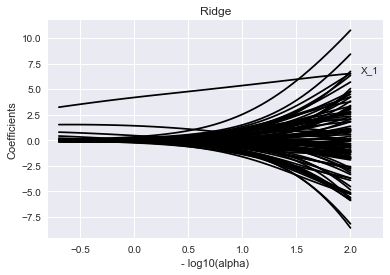

In [29]:
# 横軸に-log10(α)、縦軸に係数を置いた折れ線グラフ
# 100回繰り返さなくても、自動で線を100本引いてくれる

# αを変換
log_alphas = -sp.log10(ridge_alphas)
# 横軸に-log10(α)、縦軸に係数を置いた折れ線グラフ
plt.plot(log_alphas, ridge_coefs, color = 'black')
# 説明変数X_1の係数がわかるように目印を入れる
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")
# X軸の範囲
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
# 軸ラベル
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

横軸が$-\log_{10}\alpha$なので、左に行けば行くほど$\alpha$の値が大きく正規化の強度が強いことに注意してください。  
左側だと（大きく正規化の強度が強い）絶対値が小さな係数が推定される傾向があり、右側に行く（大きく正規化の強度が弱い）と絶対値の大きな係数が推定されやすくなることがわかります。

X_1の係数は、$-\log_{10}\alpha$が0の付近では、他の係数と比較して絶対値がかなり大きな係数になっているようです。

### 実装：Ridge回帰-最適な正則化の強度の決定

solution-pathから$\alpha$によって係数の値が大きく変わることがわかりました。  
ここからは、クロスバリデーションを用いて予測精度が最も良くなる$\alpha$の大きさを求める作業に移ります。

一連の手順は、`RidgeCV`関数を用いて10分割交差検定を行います。

In [30]:
# CVで最適なαを求める
ridge_best = linear_model.RidgeCV(
    cv = 10, alphas = ridge_alphas, fit_intercept = False)
ridge_best.fit(X, y) 

# 最適な-log10(α)
-sp.log10(ridge_best.alpha_)

0.237

$-\log_{10}\alpha = 0.237$の地点を先ほどのsolution-pathでみると、X_1以外の説明変数の係数の絶対値が0に近くなっていることがわかります。  

最適な$\alpha$と推定された係数の一覧は以下の通りです。

In [31]:
# 最適なα
ridge_best.alpha_

0.580

In [32]:
# 最適なαの時の、回帰係数
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

説明変数X_1の係数が4.463となっており、通常の最小二乗法のX_1の係数が14.76だったことを踏まえると、正解とかなり近い値になっていることがわかります。  
ただし、他の説明変数の係数を見ると、それなりに小さな値になっているものの、影響がないとは言えません。

###  実装：Lasso回帰 - 罰則項の影響

続いて、Lasso回帰に移ります。  
solution-pathがRidge回帰とどのように異なるかを確認していきます。  
`lasso_path`という便利な関数があるのでそれを用います。

In [37]:
# αを変えて何度もLasso回帰を実行
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
    X, y, fit_intercept = False)

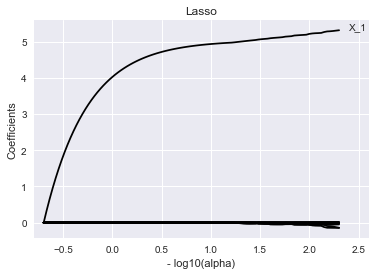

In [38]:
# Lasso回帰のsolution-path

# αを変換
log_alphas = -sp.log10(lasso_alphas)
# 横軸に-log10(α)、縦軸に係数を置いた折れ線グラフ
plt.plot(log_alphas, lasso_coefs.T, color = 'black')
# 説明変数X_1の係数がわかるように目印を入れる
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "X_1")
# X軸の範囲
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
# 軸ラベル
plt.title("Lasso")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

X_1の係数以外はほぼ0となりました。これが$L_1$正則化の効果です。

### 実装：Lasso回帰-最適な正則化の強度の決定

Ridge回帰のときと同じく、`LassoCV`という関数でクロスバリデーションを行い$\alpha$を決定します。

In [39]:
# CVで最適なαを求める
lasso_best = linear_model.LassoCV(
    cv = 10, alphas = lasso_alphas, fit_intercept = False)
lasso_best.fit(X, y)

# 最適な-log(α)
-sp.log10(lasso_best.alpha_)

2.301

In [41]:
# 最適なα
lasso_best.alpha_

0.005

推定された係数の一覧は以下のとおりです。  
X_1の係数がおおよそ5となり、その他のほとんどの係数が0となったため、変数選択の効果を請けて正しくモデルを推定できた。

In [42]:
# 最適なαの時の、回帰係数
lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e

----

## おまけ - データを標準化しないとどうなるのか

「データを標準化しないとパラメータ推定時に影響を与える」

実際にどんな影響を与えるのかを確かめる

In [44]:
# ファイルからのデータ読み込み
"""
サンプルサイズは150で、説明変数が100個あるデータ
"""
X = pd.read_csv("7-3-1-large-data.csv")

In [45]:
# 応答変数を作る

# 正規分布に従うノイズ
np.random.seed(1)
noise =  sp.stats.norm.rvs(loc = 0, scale = 1, size = X.shape[0])

# 正しい係数は5として応答変数を作る
y =  X.X_1 * 5 + noise

/Users/kaito/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


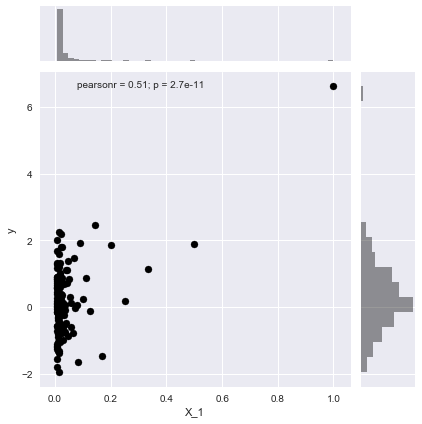

In [46]:
# 応答変数と説明変数をまとめる
large_data = pd.concat([pd.DataFrame({"y":y}), X], axis = 1)
# 散布図の作成
sns.jointplot(y = "y", x = "X_1", data = large_data,
              color = 'black')

### Ridge回帰

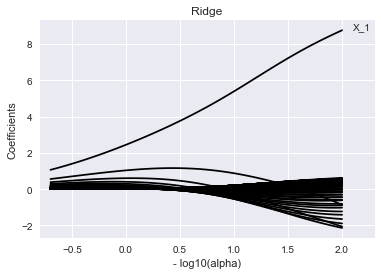

In [49]:
# αを変えて何度もRidge回帰を実行

# 推定された回帰係数を格納するリスト
ridge_coefs = []
# forループで何度もRidge回帰を推定する
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
    

# アレイに変換
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape
    
# 横軸に-log10(α)、縦軸に係数を置いた折れ線グラフ
# 100回繰り返さなくても、自動で線を100本引いてくれる

# αを変換
log_alphas = -sp.log10(ridge_alphas)
# 横軸に-log10(α)、縦軸に係数を置いた折れ線グラフ
plt.plot(log_alphas, ridge_coefs, color = 'black')
# 説明変数X_1の係数がわかるように目印を入れる
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")
# X軸の範囲
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
# 軸ラベル
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

In [52]:
# CVで最適なαを求める
ridge_best = linear_model.RidgeCV(
    cv = 10, alphas = ridge_alphas, fit_intercept = False)
ridge_best.fit(X, y) 

print('最適な-log10(α)')
print(-sp.log10(ridge_best.alpha_))

print('最適なα')
print(ridge_best.alpha_)

最適な-log10(α)
0.18163265306122445
最適なα
0.6582143509786953


In [53]:
# 最適なαの時の、回帰係数
ridge_best.coef_

array([2.898, 1.118, 0.597, 0.367, 0.245, 0.173, 0.128, 0.098, 0.078,
       0.063, 0.052, 0.046, 0.039, 0.036, 0.032, 0.031, 0.028, 0.028,
       0.027, 0.027, 0.027, 0.026, 0.027, 0.026, 0.028, 0.027, 0.028,
       0.027, 0.029, 0.028, 0.029, 0.029, 0.029, 0.03 , 0.03 , 0.03 ,
       0.031, 0.03 , 0.031, 0.031, 0.032, 0.033, 0.032, 0.032, 0.032,
       0.033, 0.034, 0.032, 0.033, 0.034, 0.033, 0.033, 0.035, 0.034,
       0.034, 0.035, 0.034, 0.034, 0.034, 0.035, 0.035, 0.035, 0.035,
       0.035, 0.034, 0.035, 0.035, 0.035, 0.034, 0.035, 0.036, 0.035,
       0.034, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035,
       0.034, 0.034, 0.035, 0.034, 0.035, 0.035, 0.034, 0.035, 0.035,
       0.035, 0.034, 0.034, 0.034, 0.034, 0.035, 0.034, 0.033, 0.034,
       0.034])

係数が5とは程遠い2.898となって、ちゃんと推定できていない。

### Lasso回帰

/Users/kaito/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


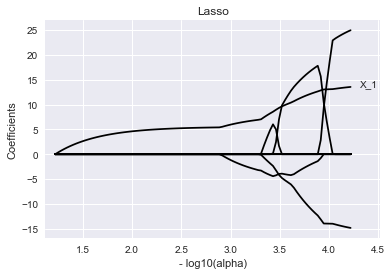

In [75]:
# αを変えて何度もLasso回帰を実行
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
    X, y, fit_intercept = False, max_iter=1000)

# Lasso回帰のsolution-path

# αを変換
log_alphas = -sp.log10(lasso_alphas)
# 横軸に-log10(α)、縦軸に係数を置いた折れ線グラフ
plt.plot(log_alphas, lasso_coefs.T, color = 'black')
# 説明変数X_1の係数がわかるように目印を入れる
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "X_1")
# X軸の範囲
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
# 軸ラベル
plt.title("Lasso")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

In [65]:
# CVで最適なαを求める
lasso_best = linear_model.LassoCV(
    cv = 10, alphas = lasso_alphas, fit_intercept = False, max_iter=1000)
lasso_best.fit(X, y)

print('最適な-log(α)')
print(-sp.log10(lasso_best.alpha_))

print('最適なα')
print(lasso_best.alpha_)

最適な-log(α)
2.8552063841488518
最適なα
0.0013957049406291683


/Users/kaito/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [66]:
# 最適なαの時の、回帰係数
lasso_best.coef_

array([ 5.404, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ])

推定結果は良さそうだけど、ConvergenceWarningという警告が出ている

### ConvergenceWarningとは


Lasso回帰で説明変数の係数（パラメータ）を推定するときは以下のような更新式を用いて、収束するもしくは更新回数の上限が来るまで更新する。  
ここでは、正則化の強さ$\alpha$を$\lambda$で表している。

<img src='beta_eqn.png', width=480, height=320>

$S$は**soft-thresholding operator**と呼ばれ、

<img src='soft_threashold_operator.png', width=320, height=160>

として表される。

この式から分かるように、データ（$x$）の値が標準化せず大きいままだと、微小な正規化の強度$\lambda$に対して更新の幅が小さくなる。  
そのため、収束条件にたどり着くまでに更新回数の上限（`max_iter`）に達してしまい、「Objective did not converge」と警告が出てくる。

この対策として、最も手っ取り早いのが本で述べていたデータの標準化で、標準化してもConvergenceWarningが出る場合は、`max_iter`を大きくすることで対応できる。

参照：[Lassoの理論と実装 -スパースな解の推定アルゴリズム-](https://satopirka.com/2017/10/lasso%E3%81%AE%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%A3%85--%E3%82%B9%E3%83%91%E3%83%BC%E3%82%B9%E3%81%AA%E8%A7%A3%E3%81%AE%E6%8E%A8%E5%AE%9A%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0-/)